# Compare  Hologram resolution performances


- author : Sylvie Dagoret-Campagne
- affiliation : LAL
- date March 16th 2017


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [28]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Constants for conversions

In [29]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [30]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [31]:
deg_to_rad=np.pi/180.

In [32]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [33]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [34]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [35]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [36]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [37]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

### Path input files for all holograms

#### path for null incident angle

In [38]:
path_holo_0_0="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/OpticSimWthB4/MyHOLO/Ana_2017_March_07"

#### path for 0.5 arcmin incident angle

In [39]:
path_holo_5_5="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/OpticSimWthB4/MyHOLO/Ana_2017_March_15"

#### path 1 arcmin incident angle

In [40]:
path_holo_10_10="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/OpticSimWthB4/MyHOLO/Ana_2017_March_16"

### List of orders

In [41]:
orders=["O0","OP1","OM1","OP2","OM2"]
order_str=["0","+1","-1","+2","-2"]

In [42]:
NB_ORDERS=len(orders)

### Angle of incidences

In [43]:
def Get_theta_str(theta_x,theta_y):
    
    theta_x_num=int(theta_x*10)
    theta_y_num=int(theta_y*10)
    
    if theta_x_num>0:
        theta_nstr='{:0>2}'.format(theta_x_num)
        theta_x_str="p"+theta_nstr
    else:
        theta_nstr='{:0>2}'.format(-theta_x_num)
        theta_x_str="m"+theta_nstr
    
    if theta_y_num>0:
        theta_nstr='{:0>2}'.format(theta_y_num)
        theta_y_str="p"+theta_nstr
    else:
        theta_nstr='{:0>2}'.format(-theta_y_num)
        theta_y_str="m"+theta_nstr 
        
    if theta_x_num==0:
        theta_x_str="0"
    if theta_y_num==0:
        theta_y_str="0"   
        
    return theta_x_str,theta_y_str

## Few functions

In [44]:
def BuildInputFilename(NBTOT,theta_x_str,theta_y_str,order):
    rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}_{}.xlsx".format(NBTOT,theta_x_str,theta_y_str,order)
    return rayfile

In [45]:
def BuildInputFullFilename(path,thefile):
    return os.path.join(path,thefile)

In [46]:
def ReadExcelFile(rayfile):
    input = pd.ExcelFile(rayfile)
    sheet_name=input.sheet_names[0]
    #df_colname = input.parse(sheet_name,index_row=0,header=1,usecols=range(0,14))
    #df_colname.head()
    df = input.parse(sheet_name,index_row=0,header=2,usecols=range(0,13))
    #df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","col","WFE","Xgoal","Ygoal","Xfinal","Yfinal","Notes"]
    df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","WFE","Xgoal","Ygoal","Xfinal","Yfinal","Notes"]
    return df

## Read excel files

In [47]:
all_df_holo = []
all_df_angletitle = []

# Null incident angle
#-------------------------------------------
theta_x=0
theta_y=0
angletitle = '({:1.1f},{:1.1f}) arcmin'.format(theta_x,theta_y)
theta_x_str,theta_y_str=Get_theta_str(theta_x,theta_y)
inputfilename=BuildInputFilename(NBTOT,theta_x_str,theta_y_str,orders[1])
holo_filename=BuildInputFullFilename(path_holo_0_0,inputfilename)
df_holo=ReadExcelFile(holo_filename)
all_df_holo.append(df_holo)
all_df_angletitle.append(angletitle)

# 0.5 arcmin angle
#-------------------------------------------

all_angles= [[0.5,0.5], [-0.5,-0.5],[-0.5,0.5], [0.5,-0.5]]

for angles in all_angles:
    theta_x=angles[0]
    theta_y=angles[1]
    angletitle = '({:1.1f},{:1.1f}) arcmin'.format(theta_x,theta_y)
    theta_x_str,theta_y_str=Get_theta_str(theta_x,theta_y)
    relative_path=theta_x_str+"_"+theta_y_str
    full_path=path_holo_5_5+"/"+relative_path
    inputfilename=BuildInputFilename(NBTOT,theta_x_str,theta_y_str,orders[1])
    holo_filename=BuildInputFullFilename(full_path,inputfilename)
    df_holo=ReadExcelFile(holo_filename)
    all_df_holo.append(df_holo)
    all_df_angletitle.append(angletitle)
    
# 1 arcmin angle
#-------------------------------------------

all_angles= [[1,1], [-1,-1],[-1,1], [1,-1]]

for angles in all_angles:
    theta_x=angles[0]
    theta_y=angles[1]
    angletitle = '({:1.1f},{:1.1f}) arcmin'.format(theta_x,theta_y)
    theta_x_str,theta_y_str=Get_theta_str(theta_x,theta_y)
    relative_path=theta_x_str+"_"+theta_y_str
    full_path=path_holo_10_10+"/"+relative_path
    inputfilename=BuildInputFilename(NBTOT,theta_x_str,theta_y_str,orders[1])
    holo_filename=BuildInputFullFilename(full_path,inputfilename)
    df_holo=ReadExcelFile(holo_filename)
    all_df_holo.append(df_holo)
    all_df_angletitle.append(angletitle)    
    
    

In [48]:
print  all_df_angletitle

['(0.0,0.0) arcmin', '(0.5,0.5) arcmin', '(-0.5,-0.5) arcmin', '(-0.5,0.5) arcmin', '(0.5,-0.5) arcmin', '(1.0,1.0) arcmin', '(-1.0,-1.0) arcmin', '(-1.0,1.0) arcmin', '(1.0,-1.0) arcmin']


### Decoding datasets

In [49]:
all_wavelength=np.array([0.0004,0.0006,0.0008,0.001])

In [50]:
NB_WL=all_wavelength.shape[0]

In [51]:
def DecodeDataset(df):
    idy=-1
    XAV_array=np.zeros(NB_WL)
    YAV_array=np.zeros(NB_WL)
    XSTD_array=np.zeros(NB_WL)
    YSTD_array=np.zeros(NB_WL)
    XMIN_array=np.zeros(NB_WL)
    YMIN_array=np.zeros(NB_WL)
    XMAX_array=np.zeros(NB_WL)
    YMAX_array=np.zeros(NB_WL)
    DELTX_array=np.zeros(NB_WL)
    DELTY_array=np.zeros(NB_WL)
    
    wave=df["wave"]
    Xfinal=df["Xfinal"]
    Yfinal=df["Yfinal"]
    idx=-1
    for wavelength in all_wavelength:
        idx+=1
        selected_indexes=np.where(wave==wavelength)
        x=Xfinal[selected_indexes[0]]
        y=Yfinal[selected_indexes[0]]
        xav=np.average(x)
        yav=np.average(y)
        xrms=np.std(x)
        yrms=np.std(y)
        xmin=np.min(x)
        xmax=np.max(x)
        ymin=np.min(y)
        ymax=np.max(y)
            
        XAV_array[idx]=xav
        YAV_array[idx]=yav
        XSTD_array[idx]=xrms
        YSTD_array[idx]=yrms
        XMIN_array[idx]=xmin
        YMIN_array[idx]=ymin
        XMAX_array[idx]=xmax
        YMAX_array[idx]=ymax
        DELTX_array[idx]=xmax-xmin
        DELTY_array[idx]=ymax-ymin
    
    return XAV_array,YAV_array,XSTD_array,YSTD_array,XMIN_array,XMAX_array,YMIN_array,YMAX_array,DELTX_array,DELTY_array

## Plot dispersion

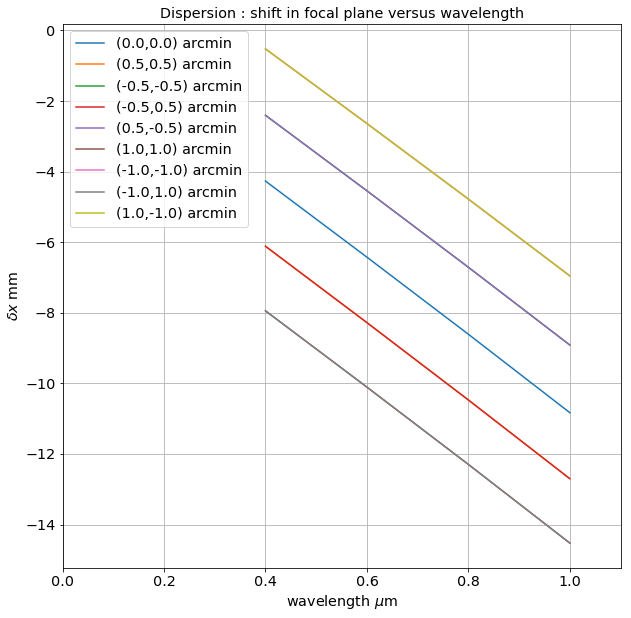

In [52]:
num=0
for df in all_df_holo:
    XAV_holo,YAV_holo,XSTD_holo,YSTD_holo,XMIN_holo,Xmax_holo,YMIN_holo,Ymax_holo,DELTX_holo,DELTY_holo=DecodeDataset(df)
    plt.plot(all_wavelength*1000,YAV_holo[:],label=all_df_angletitle[num])
    num+=1
    
plt.xlim(0,1.1)
plt.title("Dispersion : shift in focal plane versus wavelength")
plt.xlabel("wavelength $\mu$m")
plt.ylabel("$\delta x$ mm")
plt.grid()
plt.legend(loc="best")
plt.savefig('DISP_HoloHolo.jpg')

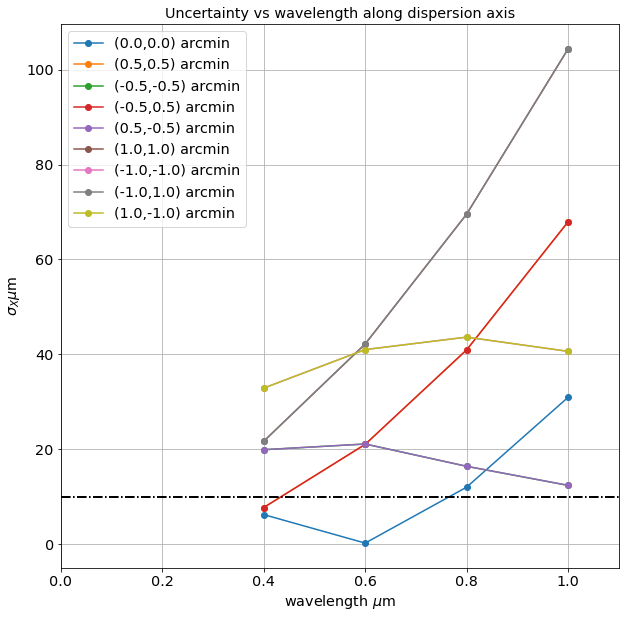

In [53]:
num=0
for df in all_df_holo:
    XAV_holo,YAV_holo,XSTD_holo,YSTD_holo,XMIN_holo,Xmax_holo,YMIN_holo,Ymax_holo,DELTX_holo,DELTY_holo=DecodeDataset(df)
    plt.plot(all_wavelength*1000,DELTY_holo[:]/2*1000,'o-',label=all_df_angletitle[num])
    num+=1

plt.plot([0.,1.1],[10.,10.],'k-.',lw=2)
plt.xlim(0,1.1)
plt.title("Uncertainty vs wavelength along dispersion axis")
plt.xlabel("wavelength $\mu$m")
plt.ylabel("$\sigma_X \mu$m")
plt.grid()
plt.legend(loc='best')
plt.savefig('RESOX_HoloHolo.jpg')

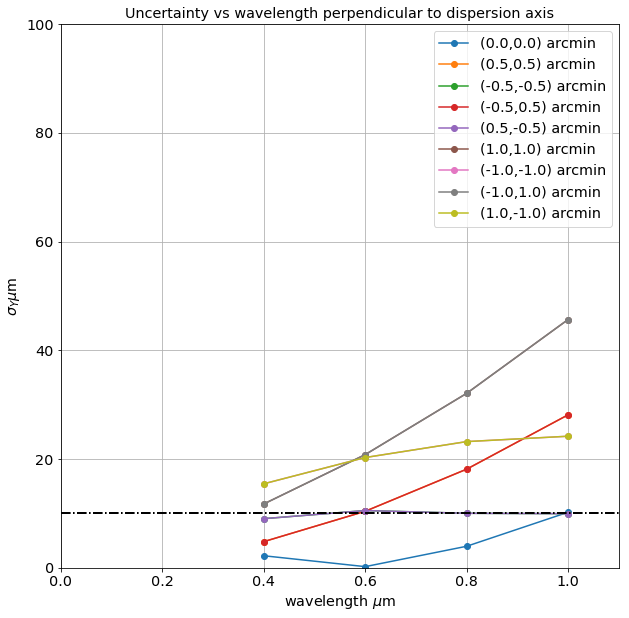

In [54]:
num=0
for df in all_df_holo:
    XAV_holo,YAV_holo,XSTD_holo,YSTD_holo,XMIN_holo,Xmax_holo,YMIN_holo,Ymax_holo,DELTX_holo,DELTY_holo=DecodeDataset(df)
    plt.plot(all_wavelength*1000,DELTX_holo[:]/2*1000,'o-',label=all_df_angletitle[num])
    num+=1


plt.plot([0.,1.1],[10.,10.],'k-.',lw=2)
plt.xlim(0,1.1)
plt.ylim(0,100.)
plt.title("Uncertainty vs wavelength perpendicular to dispersion axis")
plt.xlabel("wavelength $\mu$m")
plt.ylabel("$\sigma_Y \mu$m")
plt.grid()
plt.legend(loc='best')
plt.savefig('RESOY_HoloHolo.jpg')